# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02. Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.


In [1]:
# Package imports for data science
import numpy as np  # Scientific computing
import scipy.stats as stats  # Statistical tests
import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

C:\Users\nealj\AppData\Local\Temp\ipykernel_16788\2255606428.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Data Frame


In [2]:
apc = pd.read_csv("../data/android_persistence_cpu.csv", sep=";")
apc.PersistenceType = apc.PersistenceType.astype("category")
apc.DataSize = apc.DataSize.astype(
    CategoricalDtype(categories=["Small", "Medium", "Large"], ordered=True)
)
apc.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.


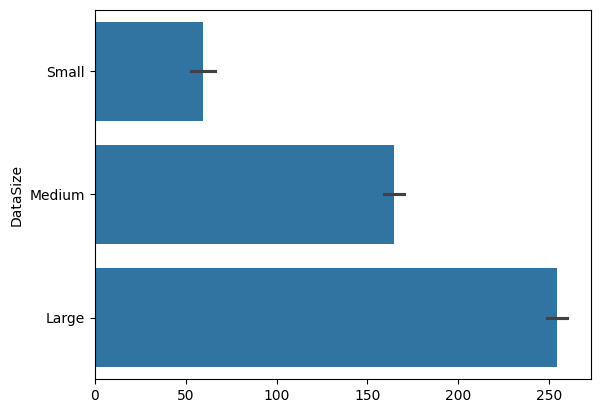

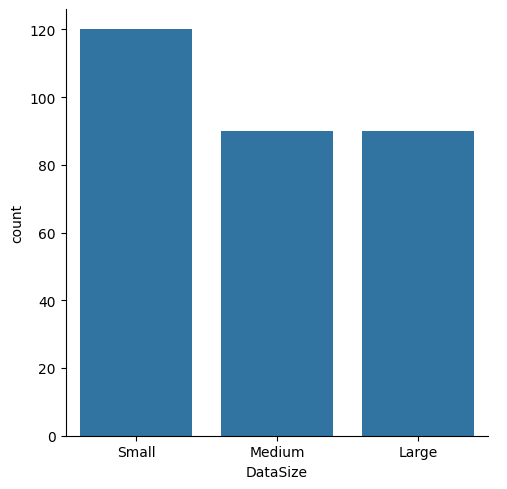

In [47]:
sns.barplot(apc.DataSize)
sns.catplot(data=apc, kind="count", x="DataSize")

<Axes: ylabel='PersistenceType'>

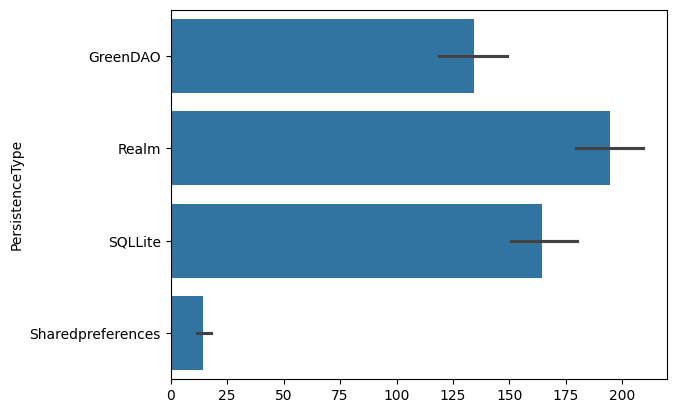

In [4]:
sns.barplot(apc.PersistenceType)

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!


<Axes: xlabel='DataSize', ylabel='count'>

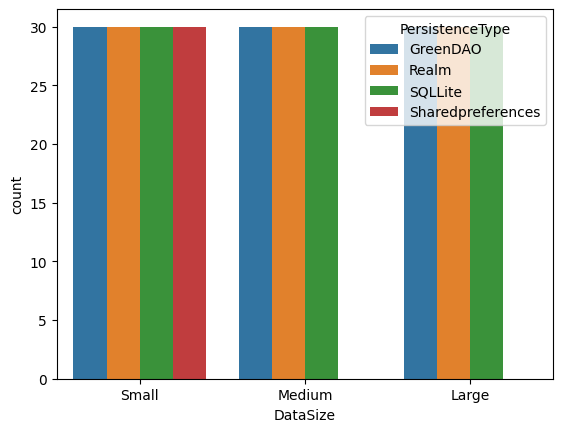

In [11]:
sns.countplot(x=apc.DataSize, hue=apc.PersistenceType)

<Axes: xlabel='PersistenceType', ylabel='count'>

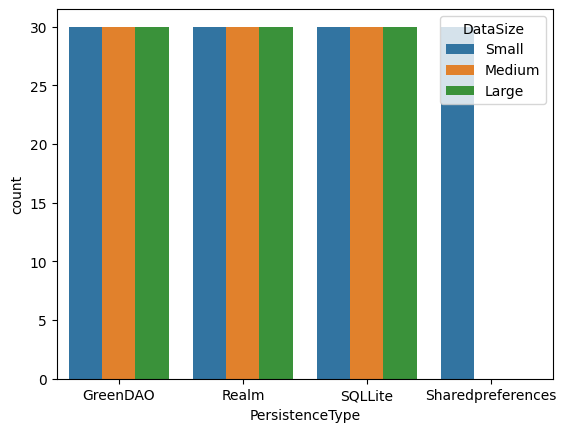

In [12]:
sns.countplot(x=apc.PersistenceType, hue=apc.DataSize)

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)


<Axes: xlabel='Time'>

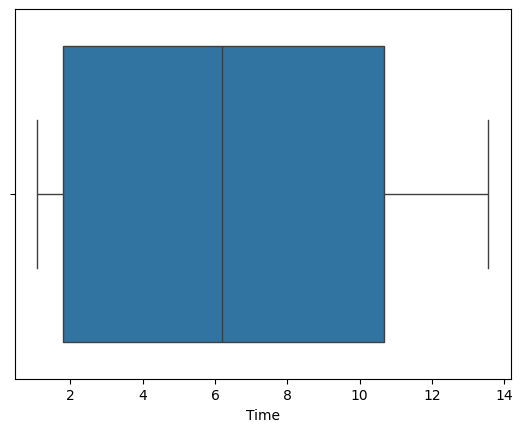

In [13]:
sns.boxplot(x=apc.Time)

<Axes: xlabel='Time', ylabel='DataSize'>

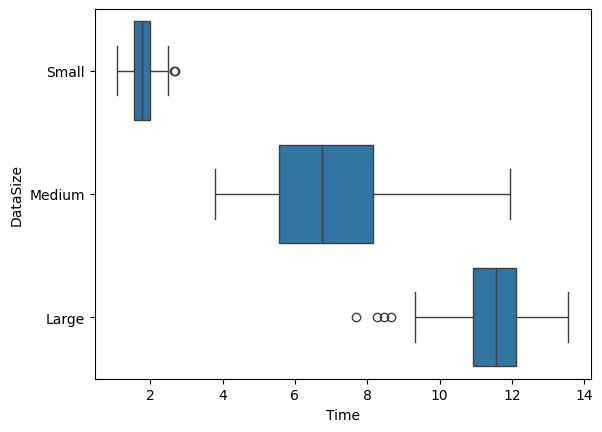

In [14]:
sns.boxplot(x=apc.Time, y=apc.DataSize)

<Axes: xlabel='Time', ylabel='DataSize'>

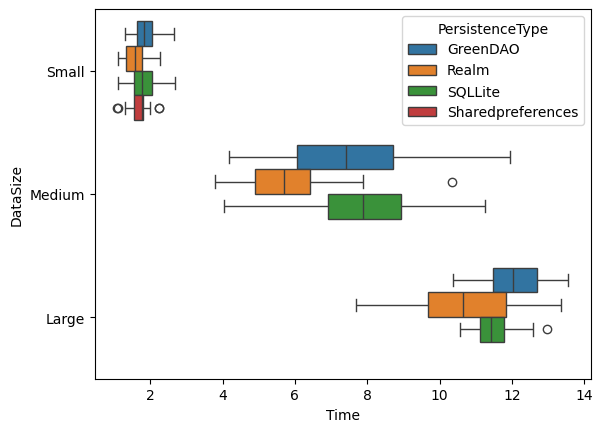

In [14]:
sns.boxplot(x=apc.Time, y=apc.DataSize, hue=apc.PersistenceType)

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)


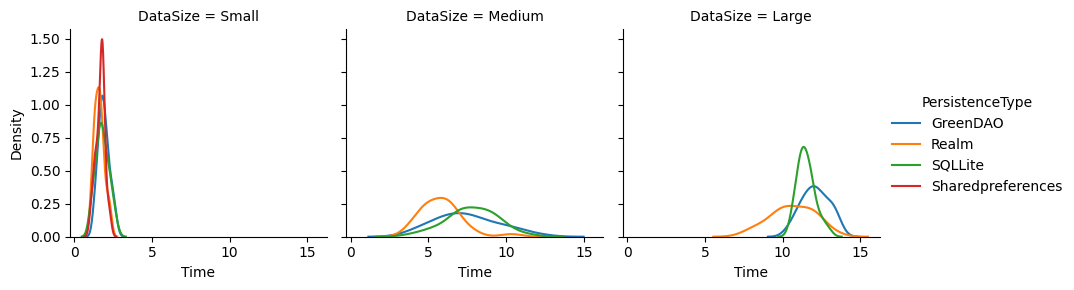

In [48]:
g = sns.FacetGrid(data=apc, col="DataSize", hue="PersistenceType")
g.map(sns.kdeplot, "Time")
g.add_legend()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`


In [59]:
print("Whole dataset")
print(apc["Time"].mean())
print(apc["Time"].std())
print()

print(apc.groupby("DataSize").Time.mean())
print(apc.groupby("DataSize").Time.std())
print()

print(apc.groupby("PersistenceType").Time.mean())
print(apc.groupby("PersistenceType").Time.std())
print()

print(apc.groupby(["DataSize", "PersistenceType"]).Time.mean())
print(apc.groupby(["DataSize", "PersistenceType"]).Time.std())
print()

Whole dataset
6.230833333333333
4.229598639871586

DataSize
Small      1.741333
Medium     7.022000
Large     11.425667
Name: Time, dtype: float64
DataSize
Small     0.358625
Medium    1.864335
Large     1.163785
Name: Time, dtype: float64

PersistenceType
GreenDAO             7.152667
Realm                6.022889
SQLLite              7.036000
Sharedpreferences    1.673667
Name: Time, dtype: float64
PersistenceType
GreenDAO             4.385917
Realm                3.884175
SQLLite              4.146336
Sharedpreferences    0.285192
Name: Time, dtype: float64

DataSize  PersistenceType  
Small     GreenDAO              1.893667
          Realm                 1.599000
          SQLLite               1.799000
          Sharedpreferences     1.673667
Medium    GreenDAO              7.454000
          Realm                 5.818000
          SQLLite               7.794000
          Sharedpreferences          NaN
Large     GreenDAO             12.110333
          Realm                10.6

C:\Users\nealj\AppData\Local\Temp\ipykernel_16788\3606069524.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(apc.groupby("DataSize").Time.mean())
C:\Users\nealj\AppData\Local\Temp\ipykernel_16788\3606069524.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(apc.groupby("DataSize").Time.std())
C:\Users\nealj\AppData\Local\Temp\ipykernel_16788\3606069524.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
